<a href="https://colab.research.google.com/github/michaeleek123/PUM_a/blob/main/09_04_2024binarnosc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rodzaj raka:
1    357
0    212
Name: count, dtype: int64


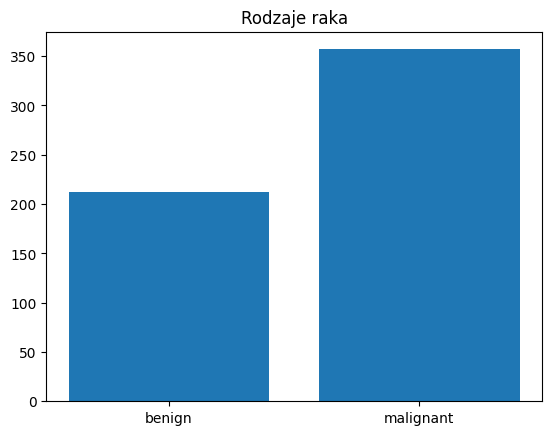

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay, RocCurveDisplay

data = load_breast_cancer()
y = data.target #list(data.target_names)
X = data.data #data.feature_names
class_counts = pd.Series(y).value_counts()

print("Rodzaj raka:")
print(class_counts)

plt.bar(class_counts.index, class_counts.values)
plt.xticks(class_counts.index, data.target_names)
plt.title('Rodzaje raka')
plt.show()

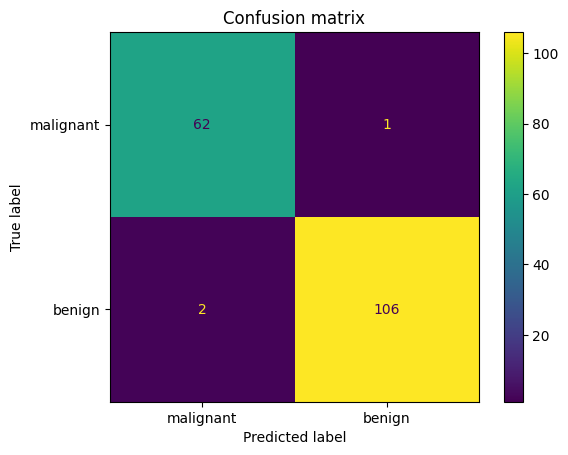

In [44]:
scaler = StandardScaler()
x_standardized = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_standardized, y, test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

disp_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp_cm.plot()
plt.title("Confusion matrix")
plt.show

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

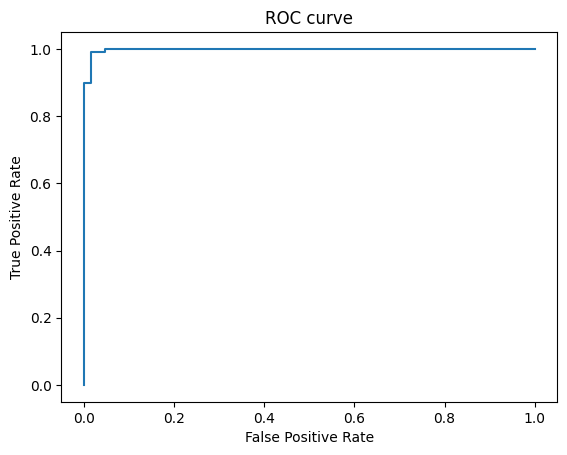

In [45]:
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()
plt.title('ROC curve')
plt.show()



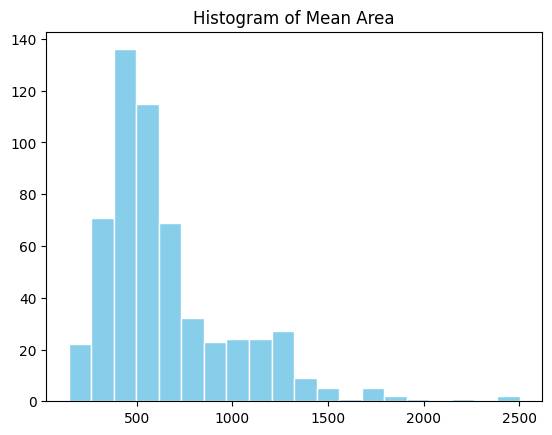

In [16]:
mean_area = X[:, data.feature_names.tolist().index('mean area')]
plt.hist(mean_area, bins=20, color='skyblue', edgecolor='white')
plt.title('Histogram of Mean Area')
plt.show()

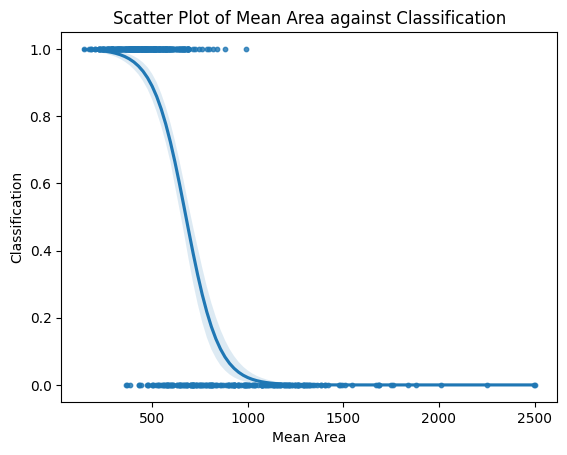

In [22]:
df = pd.DataFrame({'Mean Area': mean_area, 'Classification': y})
sns.regplot(x='Mean Area', y='Classification', data=df, logistic=True, scatter_kws={'s': 10})
plt.xlabel('Mean Area')
plt.ylabel('Classification')
plt.title('Scatter Plot of Mean Area against Classification')
plt.show()